In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Verilerin Yüklenmesi

In [2]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' #veri urlsi
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = url, extract= True) #indirilip veri seti oluşturulması

In [3]:
#verilerin bulunduğu dizin
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
#verilerin dizinleri
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir, 'validation')

cat_train_dir = os.path.join(train_dir , 'cats')
cat_validation_dir = os.path.join(validation_dir, 'cats')
dog_train_dir = os.path.join(train_dir,'dogs')
dog_validation_dir = os.path.join(validation_dir, 'dogs')

## Verilerin Anlaşılması

In [5]:
num_cats_tr = len(os.listdir(cat_train_dir))
num_dogs_tr = len(os.listdir(dog_train_dir))

num_cats_val = len(os.listdir(cat_validation_dir))
num_dogs_val = len(os.listdir(dog_validation_dir))

total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [6]:
print('Toplam Kedi Eğitim Resmi:', num_cats_tr)
print('Toplam Köpek Eğitim Resmi:', num_dogs_tr)
print('--')
print('Toplam Kedi Doğrulama Resmi:', num_cats_val)
print('Toplam Köpek Doğrulama Resmi:', num_dogs_val)
print("--")
print("Toplam Eğitim Resmi:", total_train)
print("Toplam Doğrulama Resmi:", total_validation)

Toplam Kedi Eğitim Resmi: 1000
Toplam Köpek Eğitim Resmi: 1000
--
Toplam Kedi Doğrulama Resmi: 500
Toplam Köpek Doğrulama Resmi: 500
--
Toplam Eğitim Resmi: 2000
Toplam Doğrulama Resmi: 1000


## Model Parametrelerinin Ayarlanması

In [7]:
BATCH_SIZE = 100 # tek anda alınacak resim sayısı 
IMG_SHAPE = 150 #tüm resimler 150x150 olması için değer

## Veri Çoğaltma

> Data Augmentation (Veri Çoğaltma) fazla besleme yani modelin eğitim setini ezberlemesinin önüne geçmek için kullanılan bir yoldur. Bu yol modelin aynı resmi birden fazla kez görmesinin önüne geçmeyi amaçlar. Bunu resmi doldurarak, döndürerek, blurlayarak, kırparak, yakınlaştırarak, gürültü ekleyerek, rastgele silerek, dikey veya yatay çevirerek gibi yollar ile yapar.

In [8]:
#resim göstermek için fonksiyon
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20)) #1e5'lik 20 20 büyüklüğünde pencere
  axes = axes.flatten() # axesi düzleştirme
  
  for image, ax in zip(images_arr, axes):
    ax.imshow(image) #resmi göster
  plt.tight_layout() #alt nokta parametreleri otomatik ayarlama(sığması için)
  plt.show() #pencereyi göster

#### Resimleri Rastgele Yatay Çevirme

In [9]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


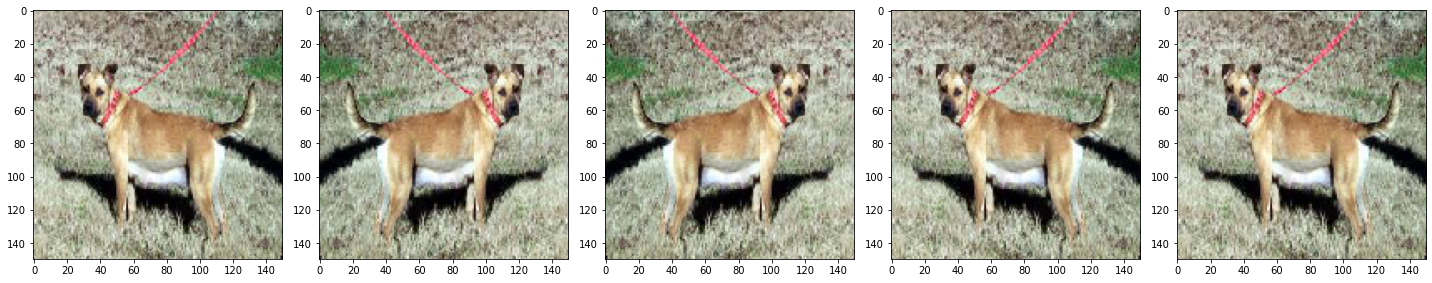

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Resimleri Döndürme

In [11]:
#görüntüyü belirli derece döndürme (altta 45)
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


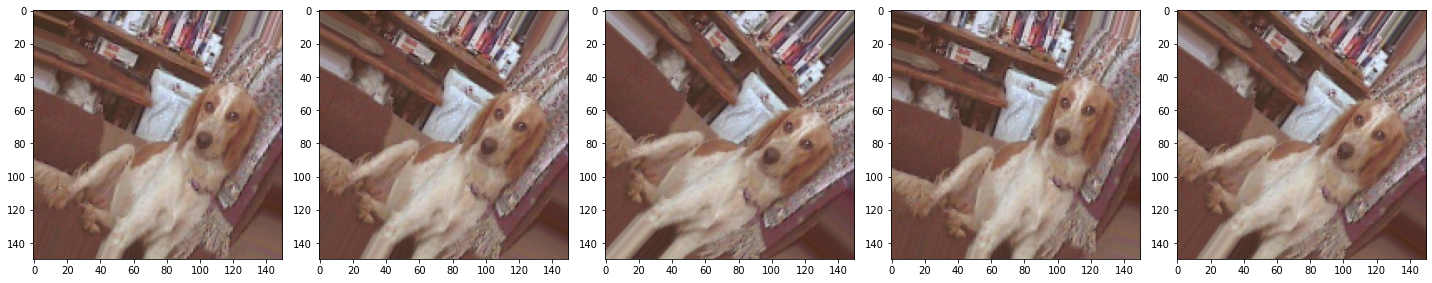

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Resimleri Büyütme

In [13]:
image_gen = ImageDataGenerator(rescale = 1./255 , zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


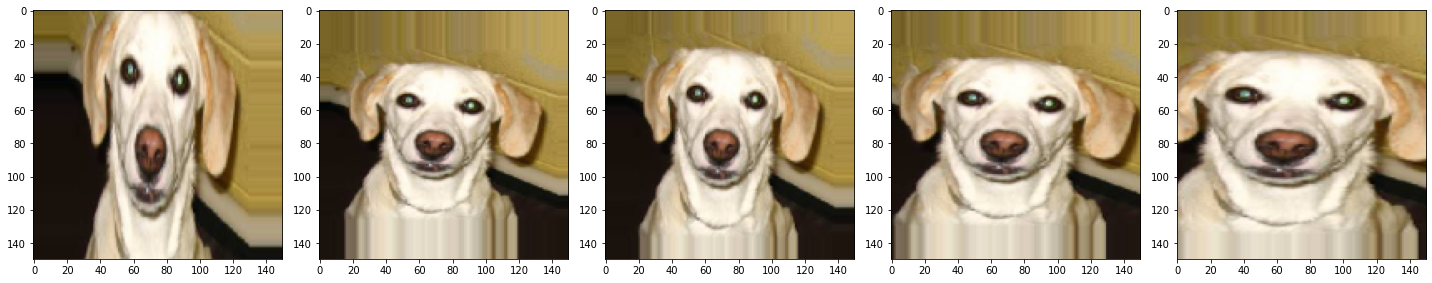

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Hepsini Uygulama

In [15]:
image_gen_train = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


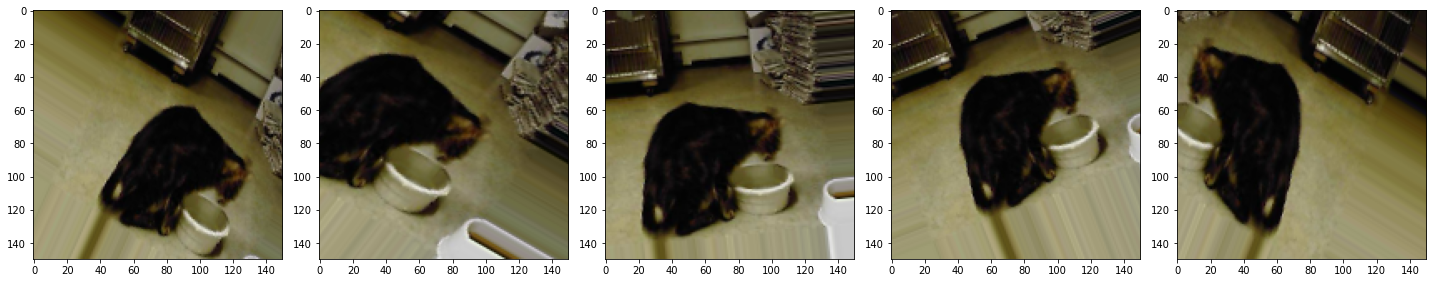

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Validation Seti Oluşturma

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## Model Oluşturma

In [18]:
model = tf.keras.models.Sequential()

In [19]:
#katmanların eklenmesi
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(2))

## Modelin Derlenmesi

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Modelin Eğitimi

In [22]:
epochs=100
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
20/20 [==============================] - 23s 960ms/step - loss: 0.7399 - accuracy: 0.5230 - val_loss: 0.6880 - val_accuracy: 0.5670
Epoch 2/100
20/20 [==============================] - 19s 962ms/step - loss: 0.6893 - accuracy: 0.5405 - val_loss: 0.6770 - val_accuracy: 0.6260
Epoch 3/100
20/20 [==============================] - 19s 973ms/step - loss: 0.6758 - accuracy: 0.5770 - val_loss: 0.6530 - val_accuracy: 0.6110
Epoch 4/100
20/20 [==============================] - 19s 969ms/step - loss: 0.6697 - accuracy: 0.5910 - val_loss: 0.6404 - val_accuracy: 0.6430
Epoch 5/100
20/20 [==============================] - 19s 968ms/step - loss: 0.6554 - accuracy: 0.6115 - val_loss: 0.6351 - val_accuracy: 0.6190
Epoch 6/100
20/20 [==============================] - 19s 978ms/step - loss: 0.6503 - accuracy: 0.6150 - val_loss: 0.6225 - val_accuracy: 0.6530
Epoch 7/100
20/20 [==============================] - 20s 984ms/step - loss: 0.6271 - accuracy: 0.6410 - val_loss: 0.6068 - val_accuracy:

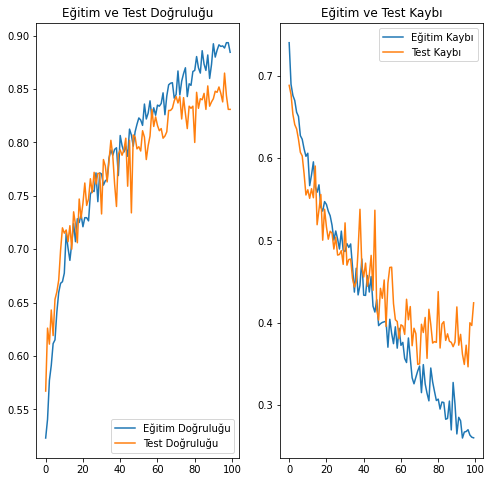

In [23]:
#eğitim ve testin kayıp ve doğruluklarının zaman içinde değişim grafiği
acc = history.history['accuracy'] #eğitim doğruluğu
val_acc = history.history['val_accuracy'] #test doğruluğu

loss = history.history['loss'] #eğitim kaybı
val_loss = history.history['val_loss'] #test kaybı

epochs_range = range(100) #epochs 100

plt.figure(figsize=(8, 8)) #8 8 büyüklüğünde pencere
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Test Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Test Doğruluğu')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Test Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Test Kaybı')
plt.savefig('./foo.png')
plt.show()
